In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## load data
df = pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## shape of the datasets
df.shape

(20640, 10)

In [4]:
## null values check
df.isnull().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

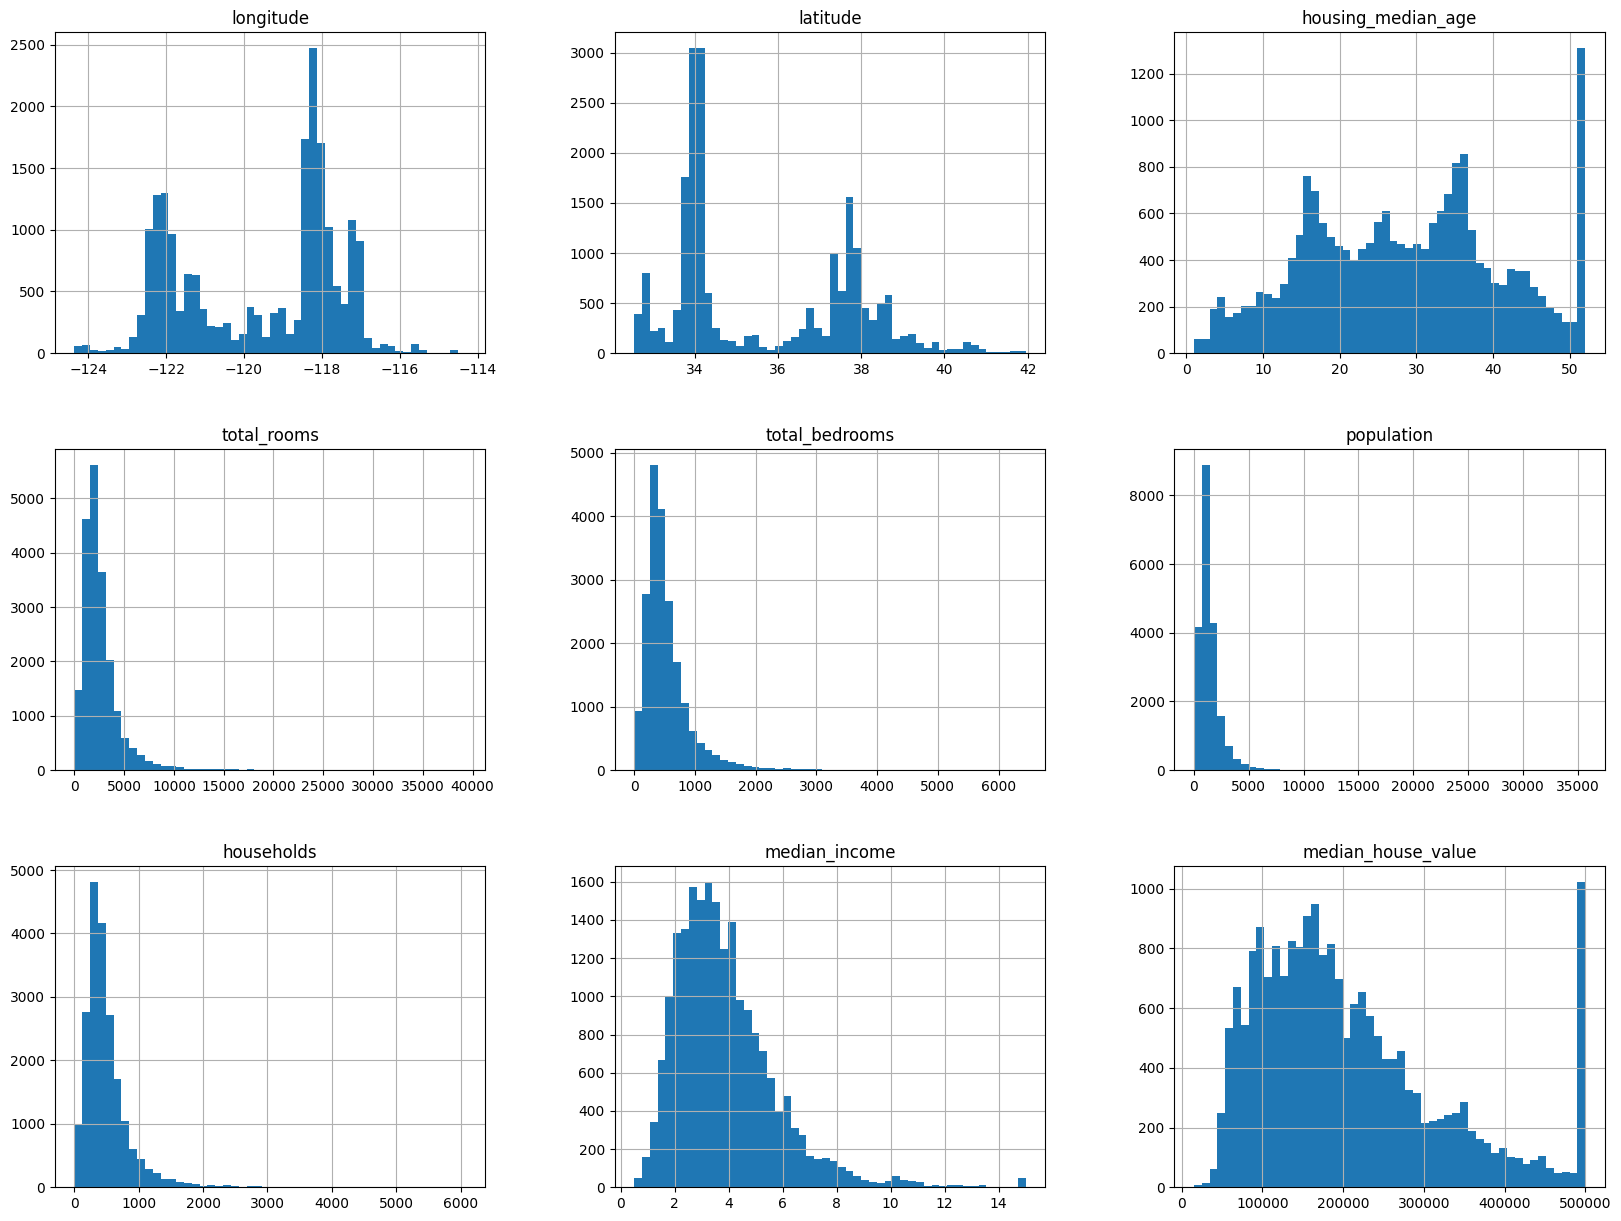

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
## data cleaning
print("mean:",df['total_bedrooms'].mean())
print("median:",df['total_bedrooms'].median())
print("mode:",df['total_bedrooms'].mode())

mean: 537.8705525375618
median: 435.0
mode: 0    280.0
Name: total_bedrooms, dtype: float64


In [11]:
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


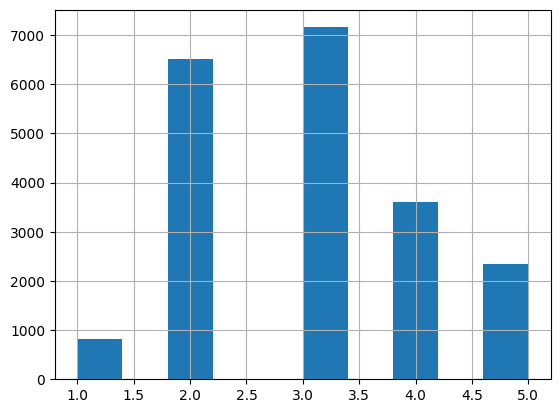

In [13]:
df['income_cat'].hist()
plt.show()

In [14]:
## data distrubution
df['income_cat'].value_counts()/len(df)

income_cat
3    0.350218
2    0.318847
4    0.176724
5    0.114374
1    0.039838
Name: count, dtype: float64

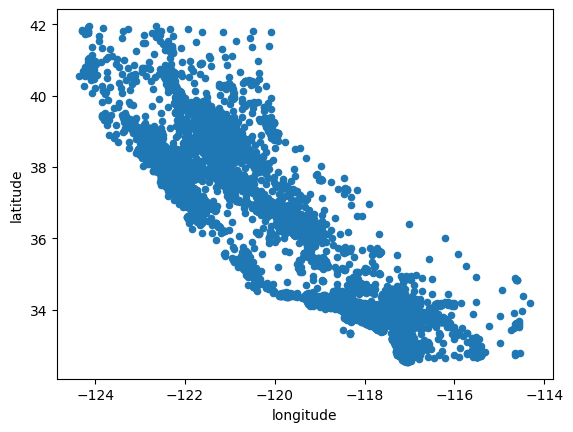

In [15]:
df.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

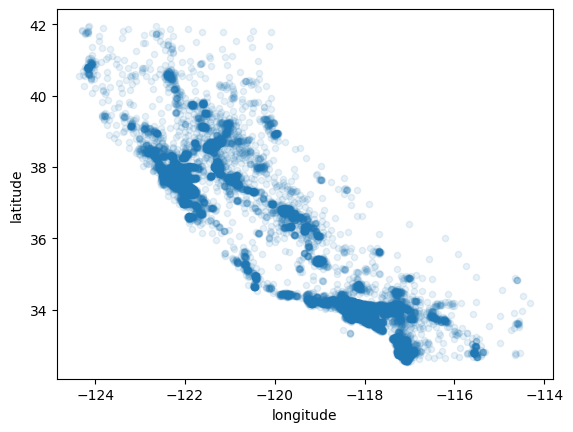

In [16]:
## better visualization highlighting high densith area
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

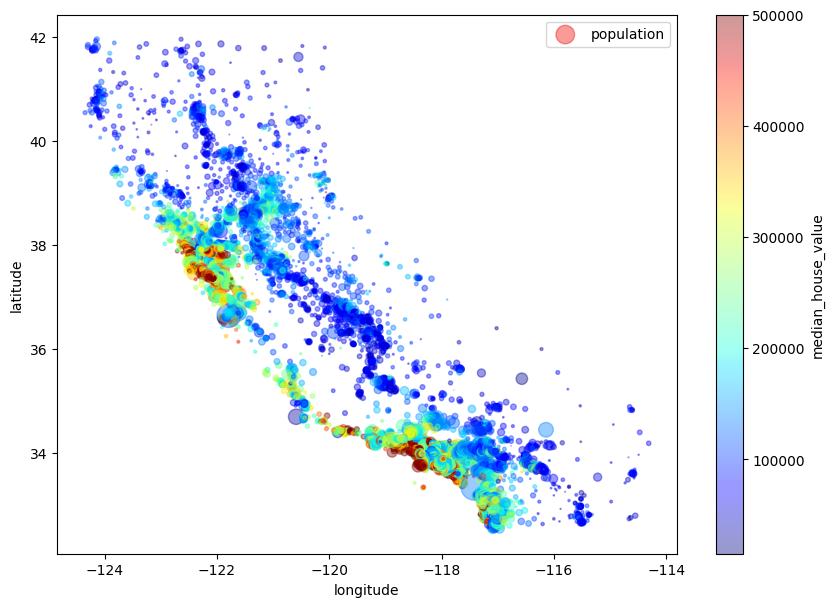

In [17]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(10, 7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

## Looking for correlation

In [18]:
def cat_num_feature_selection(dataframe):
    cat_features = [feature for feature in dataframe.columns if df[feature].dtype=='O']
    num_features = [feature for feature in dataframe.columns if df[feature].dtype!='O']
    return num_features, cat_features

In [19]:
num_features, cat_features = cat_num_feature_selection(df)

In [20]:
num_features, cat_features

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value',
  'income_cat'],
 ['ocean_proximity'])

In [21]:
corr_metrix = df[num_features].corr()
corr_metrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.010733
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.085623
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.145784
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.219996
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.025849
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.038600
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.902842
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.643941
income_cat,-0.010733,-0.085623,-0.145784,0.219996,0.015662,0.025849,0.038600,0.902842,0.643941,1.000000


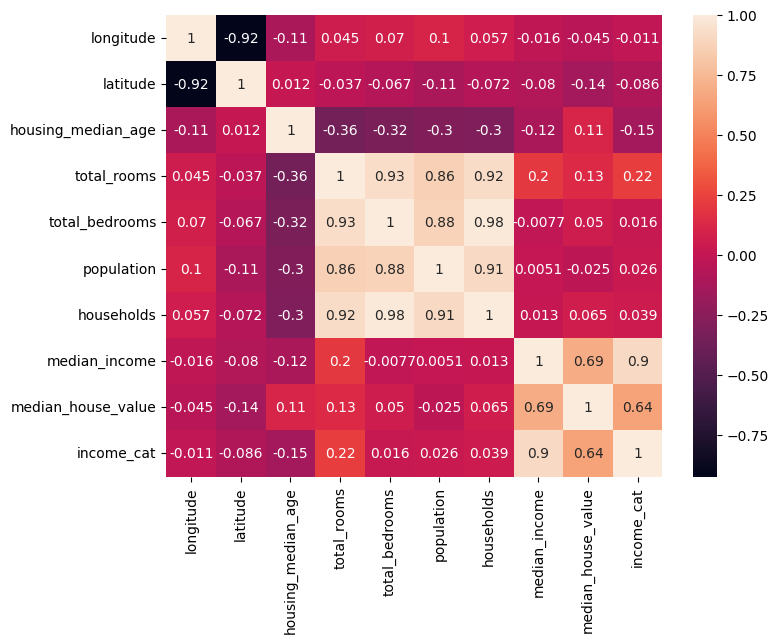

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_metrix, annot=True)
plt.show()

In [23]:
corr_metrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
income_cat            0.643941
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

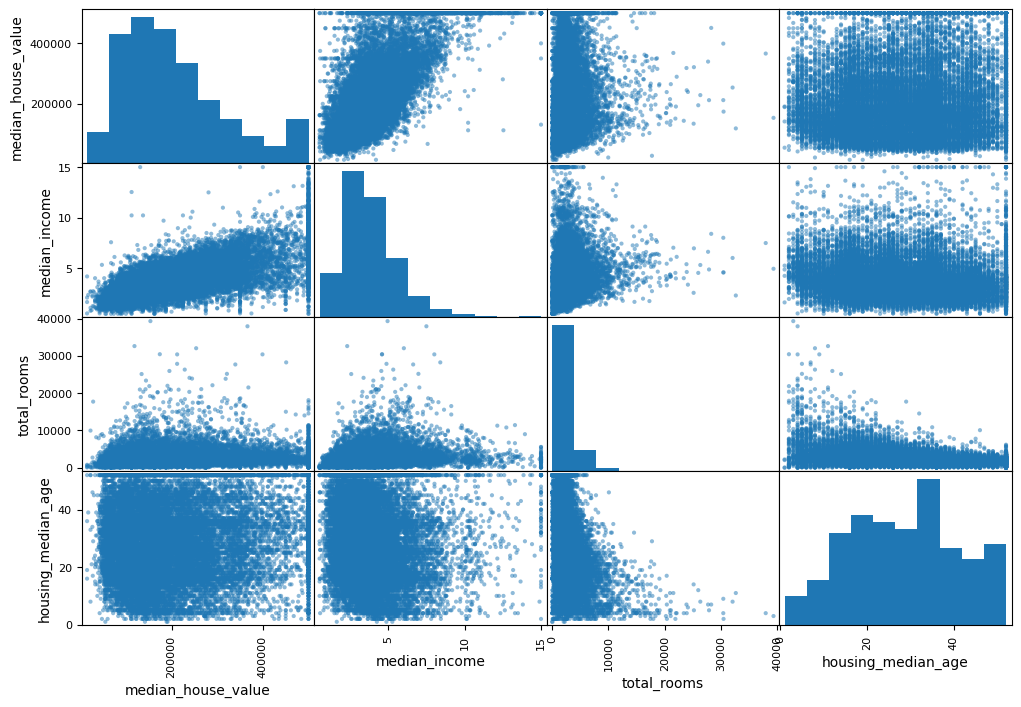

In [24]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

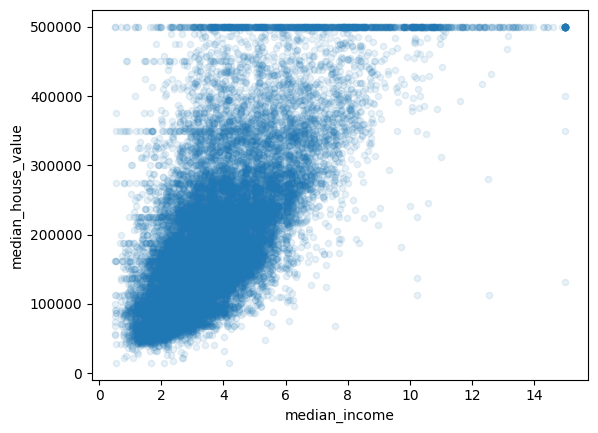

In [25]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

## Experiment with attributes contribution

In [26]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [27]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [28]:
num_features, cat_features = cat_num_feature_selection(df)

In [29]:
corr_metrix = df[num_features].corr()

In [30]:
corr_metrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
income_cat                  0.643941
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare the data for machine learning algotiths

In [31]:
## split the data into training and for test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['median_house_value']),
                                                    df['median_house_value'],
                                                    test_size=0.25,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
                                                

((15324, 13), (5109, 13), (15324,), (5109,))

In [32]:
num_features, cat_features = cat_num_feature_selection(X_train)

#### handle categorical features

In [33]:
X_train['ocean_proximity'].head(10)

2830         INLAND
14951     <1H OCEAN
8314         ISLAND
14271    NEAR OCEAN
305        NEAR BAY
8603      <1H OCEAN
5789      <1H OCEAN
19822        INLAND
20123     <1H OCEAN
9341      <1H OCEAN
Name: ocean_proximity, dtype: object

In [34]:
# ## ordinal encoding
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
# ord_cat_encoded = ordinal_encoder.fit_transform(X_train[cat_features])

In [35]:
# ordinal_encoder.categories_

In [36]:
# ## onehot encoding
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# ohe_cat_encoded = ohe.fit_transform(X_train[cat_features])

## Feature scalling

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('scaler_pipe', StandardScaler(), num_features),
    ('encoder_pipe', OneHotEncoder(), cat_features)
])

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.fit_transform(X_test)

In [39]:
X_train_transformed.shape

(15324, 17)

### Training and evaluating model on the training set

## Linear Regression algoriths 

In [43]:
# importt the linear regrssion algorith
from sklearn.linear_model import LinearRegression

## assign a variable to linear algoriths
model = LinearRegression()

# fit the model to learn from data
model.fit(X_train_transformed, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test_transformed)

In [105]:
data = {"Actual": y_test, "predicted":y_pred, 'Error': (y_test-y_pred), 'Error%':(y_test-y_pred)/y_test*100}
analysis = pd.DataFrame(data, index=None)
analysis

,Actual,predicted,Error,Error%
14416,245800.0,221953.918325,23846.081675,9.701416
16383,137900.0,136703.026121,1196.973879,0.868001
7731,218200.0,207142.859108,11057.140892,5.067434
1410,220800.0,169913.587966,50886.412034,23.046382
1335,170500.0,200601.101758,-30101.101758,-17.654605
...,...,...,...,...
14148,122500.0,216256.193666,-93756.193666,-76.535668
14743,142400.0,195608.850640,-53208.850640,-37.365766
19496,138100.0,164076.817929,-25976.817929,-18.810151
20553,95300.0,119669.075302,-24369.075302,-25.570908


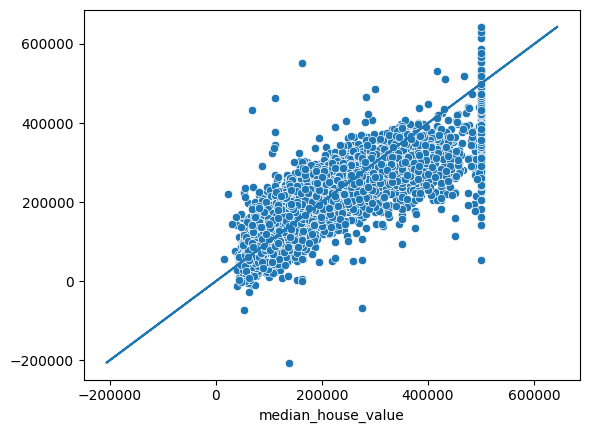

In [59]:
# check the accuarcy of the model
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_pred, y_pred)
plt.show()

## GradientBoostRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

## parameters
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = GradientBoostingRegressor(**params)

reg.fit(X_train_transformed, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [109]:
y_pred = reg.predict(X_test_transformed)

In [112]:
print(f"MSE: {mean_squared_error(y_pred, y_test)}")

MSE: 4227790667.295135


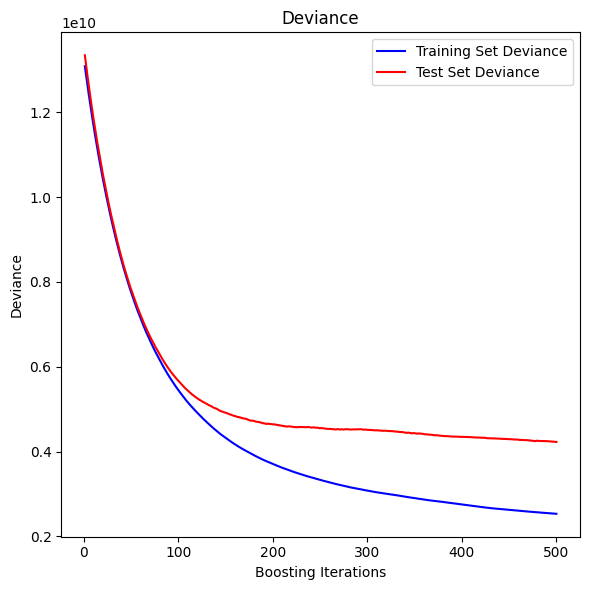

In [113]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test_transformed)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

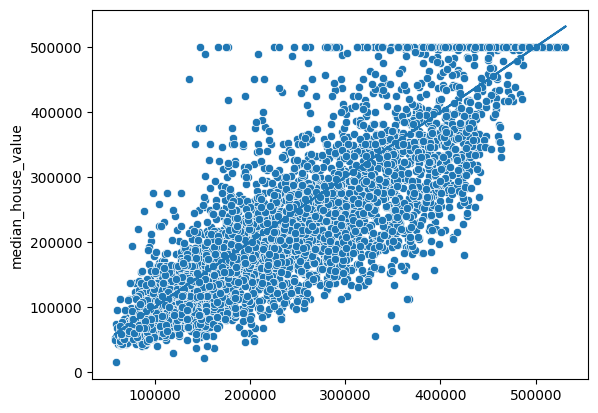

In [118]:
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(y_pred, y_pred)

In [61]:
# check the model accuaracy
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error, r2_score,confusion_matrix

In [114]:
print(f'RMS:{root_mean_squared_error(y_test, y_pred)}')
print(f"MSE:{mean_squared_error(y_pred, y_test)}")

RMS:65021.4631279175
MSE:4227790667.295135


## hyper parameter tunning

In [83]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [106]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor()
   
} ji

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 67508.0811
- Mean Absolute Error: 48960.2774
- R2 Score: 0.6562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 67840.2462
- Mean Absolute Error: 49621.0750
- R2 Score: 0.6598




/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+12, tolerance: 2.031e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 67508.1196
- Mean Absolute Error: 48960.7391
- R2 Score: 0.6562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 67835.4610
- Mean Absolute Error: 49618.9689
- R2 Score: 0.6599


Ridge
Model performance for Training set
- Root Mean Squared Error: 67511.2569
- Mean Absolute Error: 48967.1135
- R2 Score: 0.6562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 67803.4447
- Mean Absolute Error: 49605.0050
- R2 Score: 0.6602


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 50253.9185
- Mean Absolute Error: 33873.3313
- R2 Score: 0.8095
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 60848.0451
- Mean Absolute Error: 40749.3223
- R2 Score: 0.7263


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.000

In [121]:
#Initialize few parameter for Hyperparamter tuning
# knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}

In [122]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params)
                   
                   ]

In [123]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_transformed, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.0s

[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=200; total time=   3.2s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=200; total time=   3.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=200; total time=   3.2s
[CV] END max_depth=10, max_feat

/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=100; total time=   6.5s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=100; total time=   6.6s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=100; total time=   6.6s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=  16.1s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=1000; total time=  16.5s
[CV] END max_depth=15, max_features=8, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END max_

/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/

KeyboardInterrupt: 

In [ ]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='auto', max_depth=None, 
                                                     n_jobs=-1),
     "Adaboost":AdaBoostRegressor(n_estimators=60,loss='linear')
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')